VERİ GÖRSELLEŞTİRME

Pregnancies: Hamilelik sayısı

Glucose: Glikoz

BloodPressure: Kan basıncı (Diastolic(Küçük Tansiyon))

SkinThickness: Cilt Kalınlığı

Insulin: İnsülin.

BMI: Beden kitle indeksi.

DiabetesPedigreeFunction: Soyumuzdaki kişilere göre diyabet olma ihtimalimizi hesaplayan bir fonksiyon.

Age: Yaş (yıl)

Outcome: Kişinin diyabet olup olmadığı bilgisi.

In [2]:
# Gerekli Kütüphane ve Fonksiyonlar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
# from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
#pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_csv("C:/Users/HP/Desktop/Diyabet tahmin projesi/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [4]:
# Korelasyon, olasılık kuramı ve istatistikte iki rassal değişken arasındaki doğrusal ilişkinin yönünü ve gücünü belirtir
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
Glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
BloodPressure,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
SkinThickness,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
Insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
DiabetesPedigreeFunction,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
Outcome,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


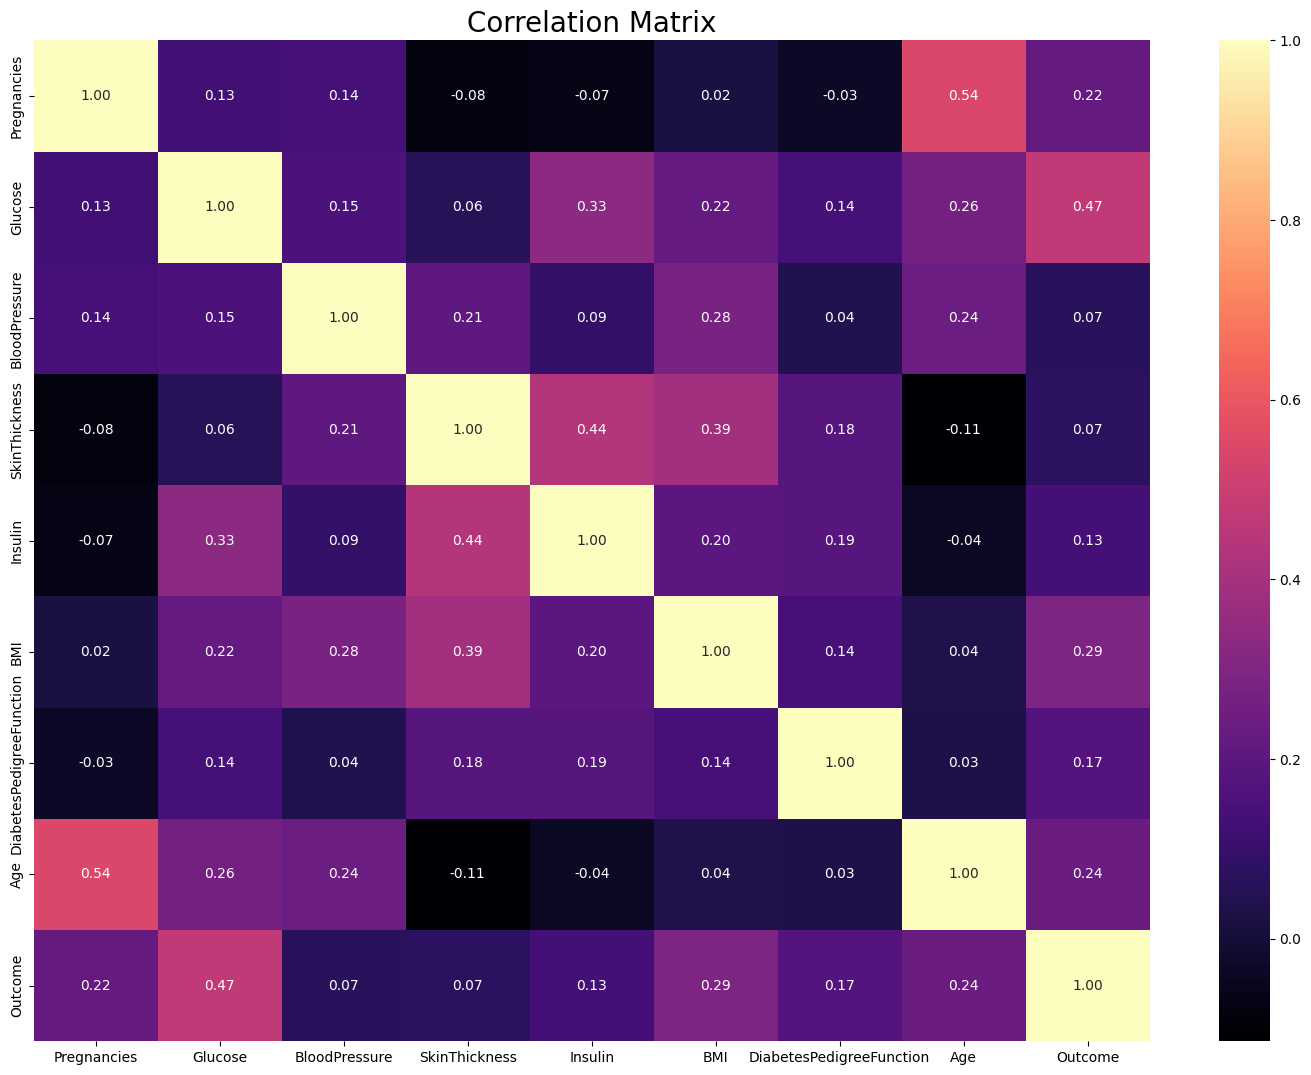

In [5]:
# Korelasyon Matrisi
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()


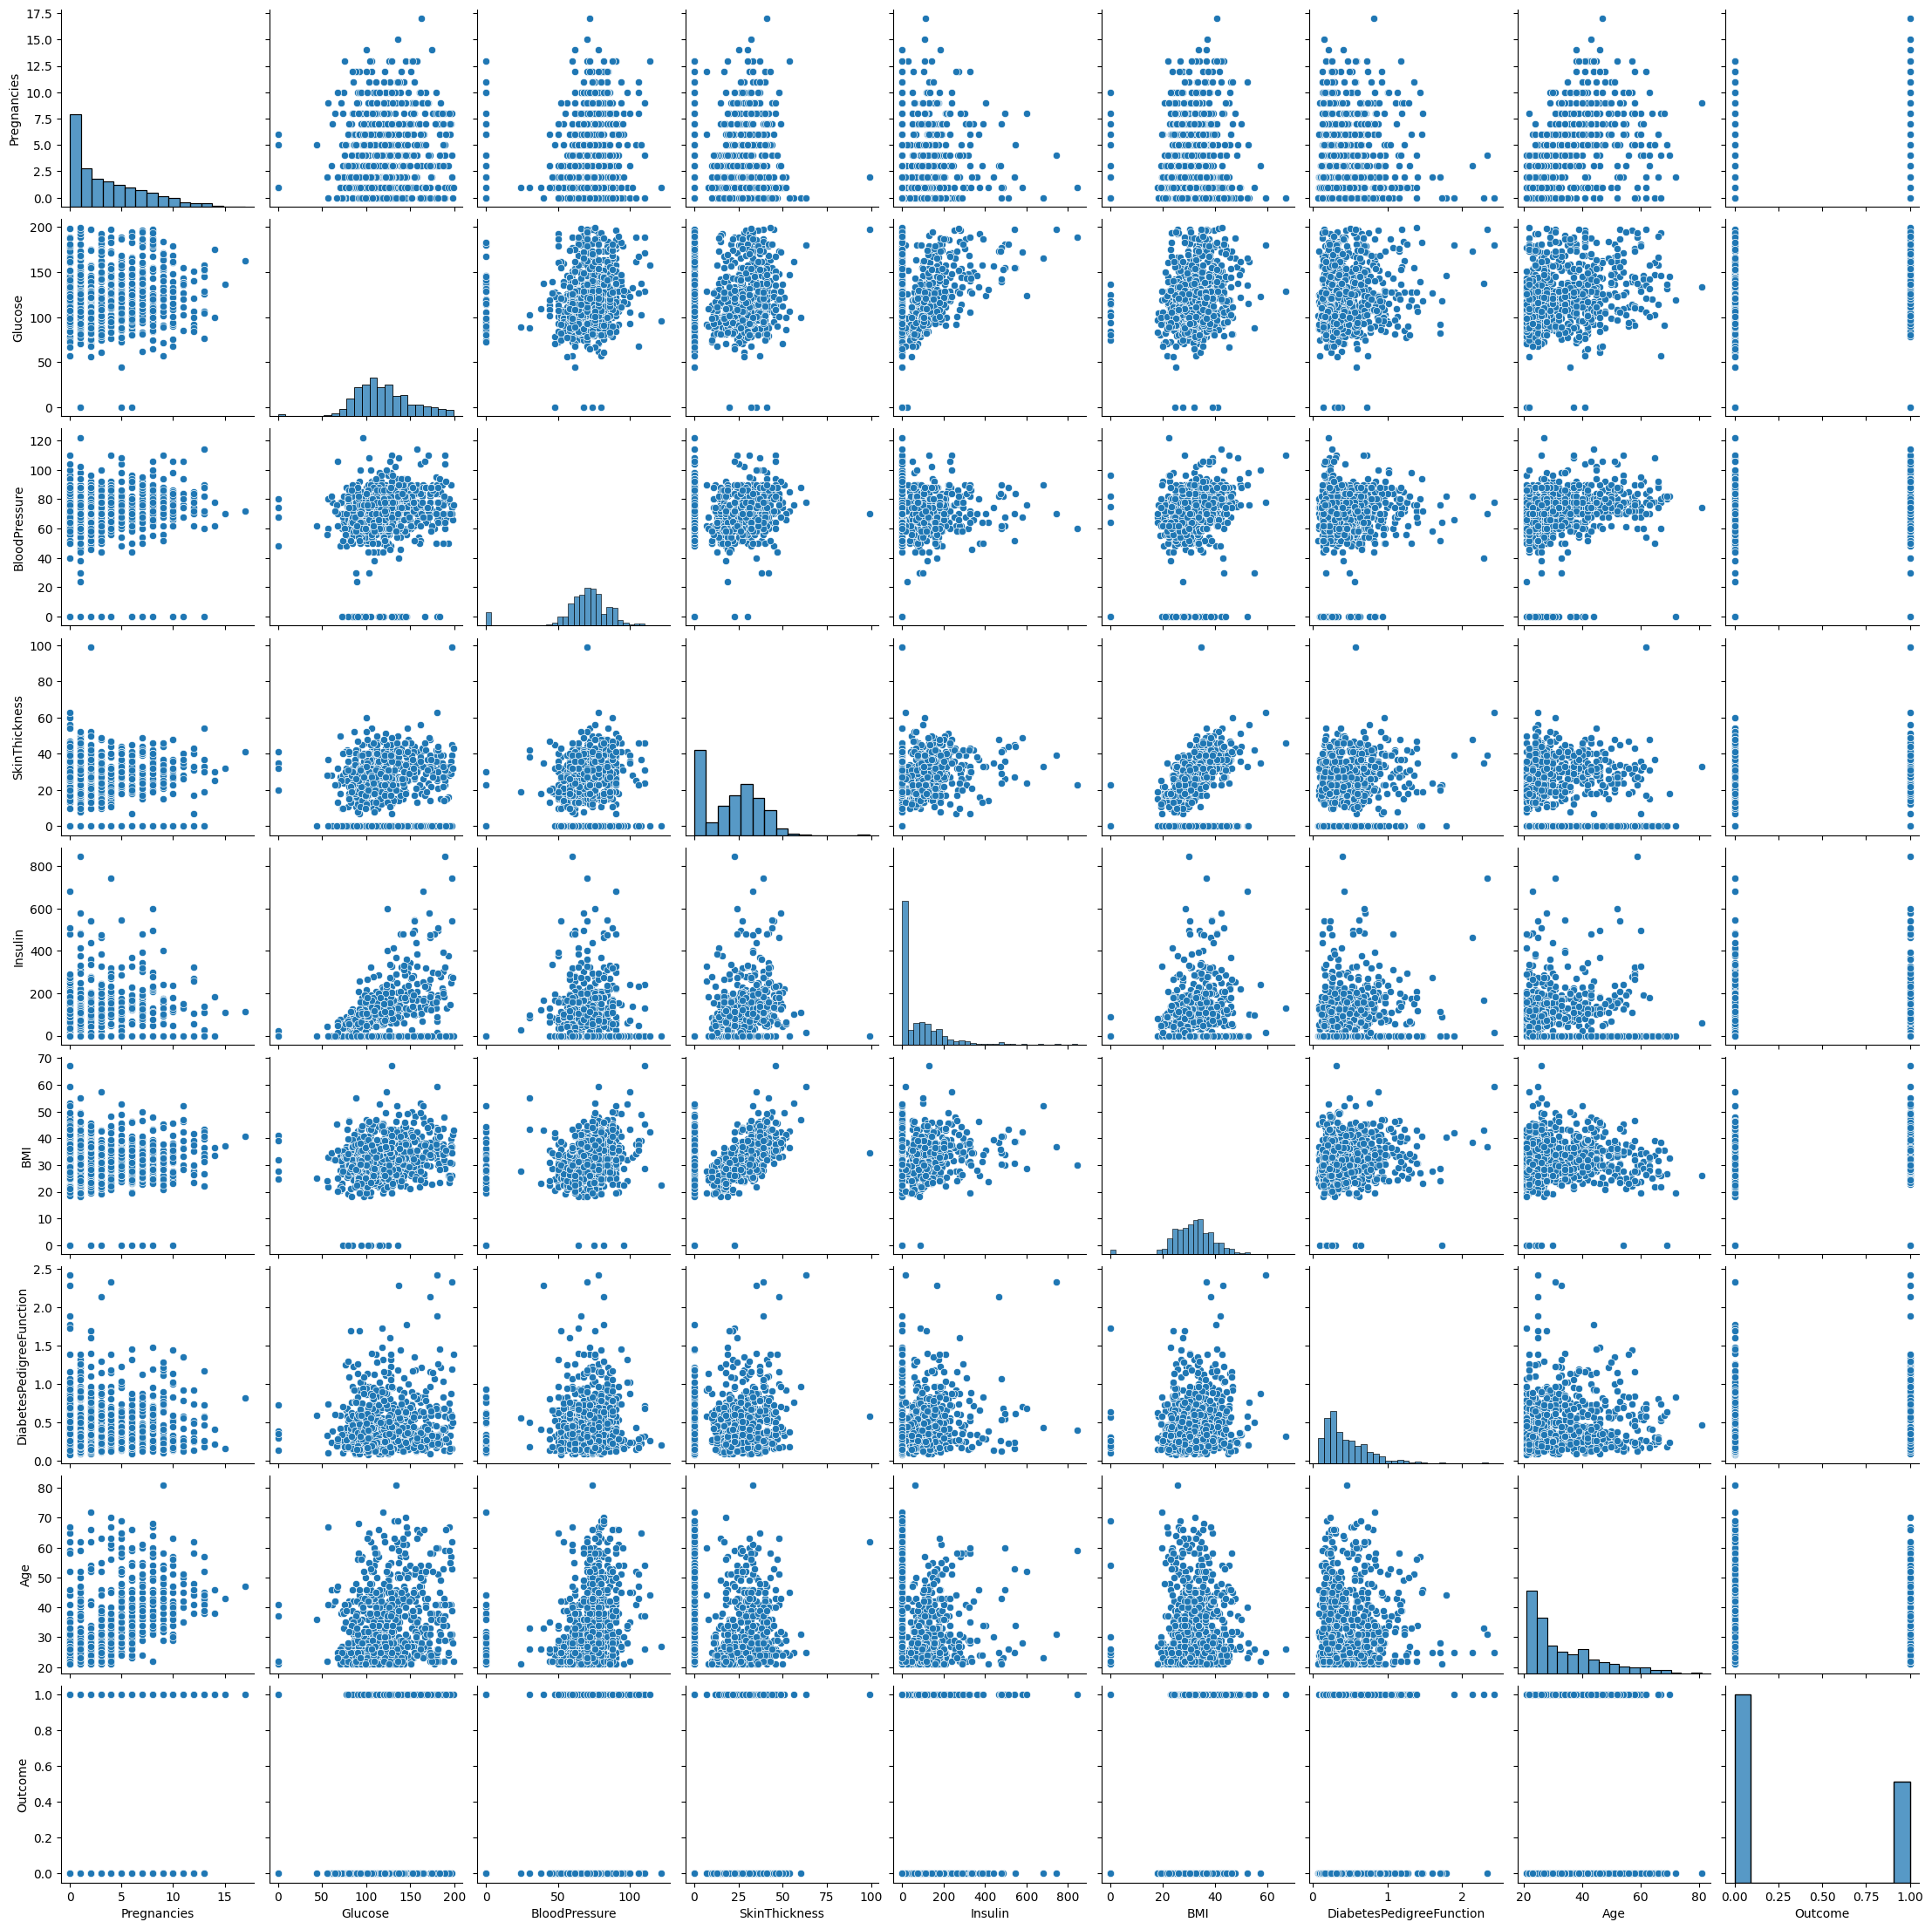

In [6]:
sns.pairplot(df);

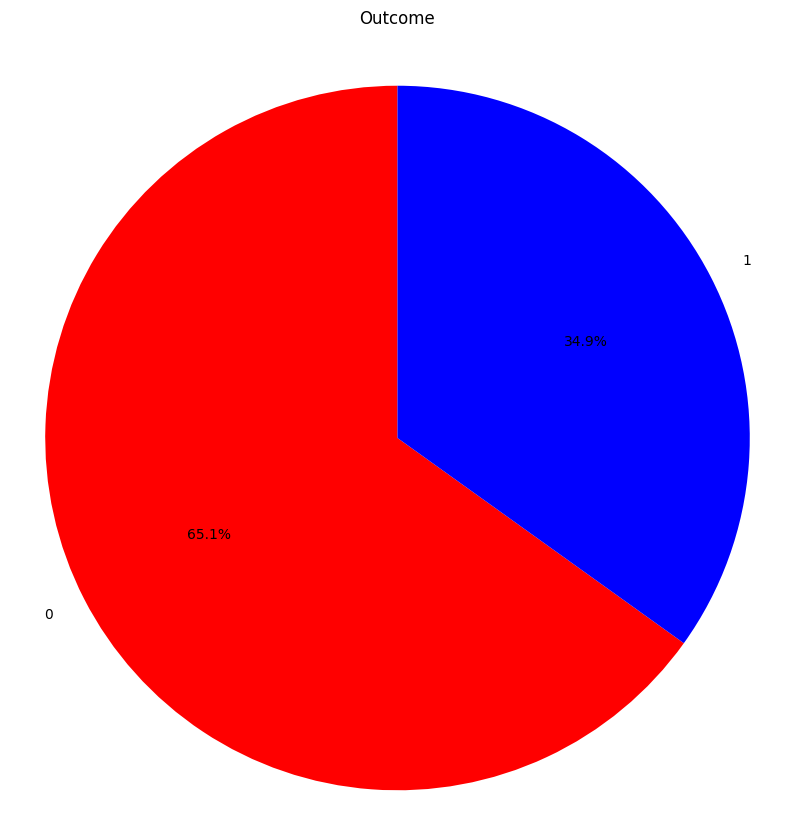

In [7]:
# Outcome (Kişinin diyabet olup olmadığı bilgisi)a göre hesaplama
outcome_counts = df['Outcome'].value_counts()

# Pasta grafiği
plt.figure(figsize=(10, 10))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'blue', 'green', 'orange', 'purple', 'pink'])
plt.title('Outcome\n')
plt.axis('equal')  # Daire şeklinde görünmesi için
plt.show()

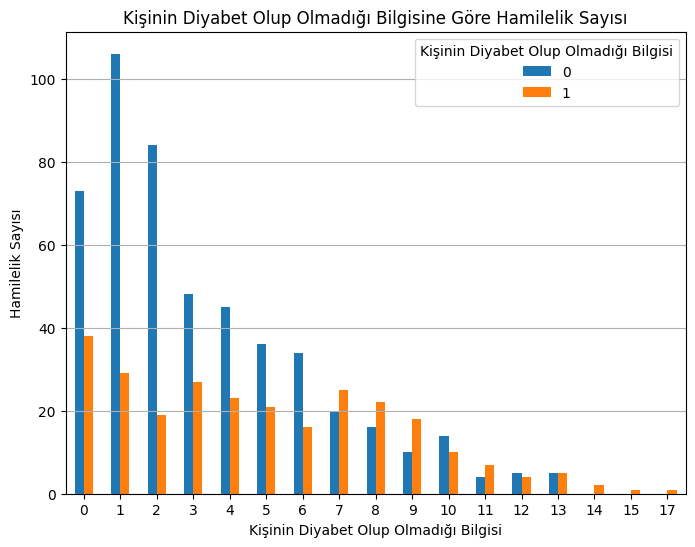

In [8]:
# Kişinin Diyabet Olup Olmadığı Bilgisine Göre Hamilelik Sayısını bar chart grafiği ile inceleyelim
pregnancies_and_outcome = df.groupby(['Pregnancies', 'Outcome']).size().unstack(fill_value=0)

# Sütun grafiğini oluşturalım
pregnancies_and_outcome.plot(kind='bar', figsize=(8, 6))
plt.title('Kişinin Diyabet Olup Olmadığı Bilgisine Göre Hamilelik Sayısı')
plt.xlabel('Kişinin Diyabet Olup Olmadığı Bilgisi')
plt.ylabel('Hamilelik Sayısı')
plt.grid(axis='y')            # Y ekseninde ızgara çizgileri
plt.xticks(rotation=0)        # X ekseni etiketlerini yatay yaz
plt.legend(title='Kişinin Diyabet Olup Olmadığı Bilgisi')
plt.show()

In [9]:
# Hamilelik sayısının Outcome'a göre dağılımı (Histogram)
plt.figure(figsize=(12, 6))

# Sağlıklı bireyler için hamilelik sayısı dağılımı
plt.hist(healthy['Pregnancies'], bins=15, alpha=0.7, label='Healthy', color='green', edgecolor='black')

# Diyabetli bireyler için hamilelik sayısı dağılımı
plt.hist(diabetic['Pregnancies'], bins=15, alpha=0.7, label='Diabetic', color='red', edgecolor='black')

plt.xlabel('Number of Pregnancies')
plt.ylabel('Frequency')
plt.title('Distribution of Pregnancies by Outcome')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


NameError: name 'healthy' is not defined

<Figure size 1200x600 with 0 Axes>

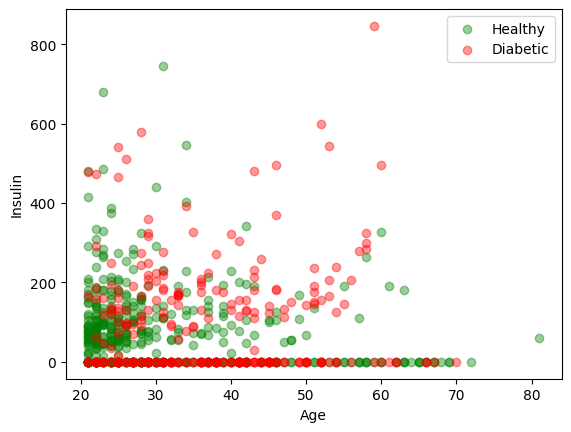

In [ ]:
#Bu grafik, sağlıklı ve diyabetik bireylerin yaş ve insülin düzeylerinin nasıl değiştiğini görselleştirir.
diabetic = df[df.Outcome == 1]
healthy = df[df.Outcome == 0]

plt.scatter(healthy.Age, healthy.Insulin, color="green", label="Healthy", alpha = 0.4)
plt.scatter(diabetic.Age, diabetic.Insulin, color="red", label="Diabetic", alpha = 0.4)
plt.xlabel("Age")
plt.ylabel("Insulin")
plt.legend()
plt.show()

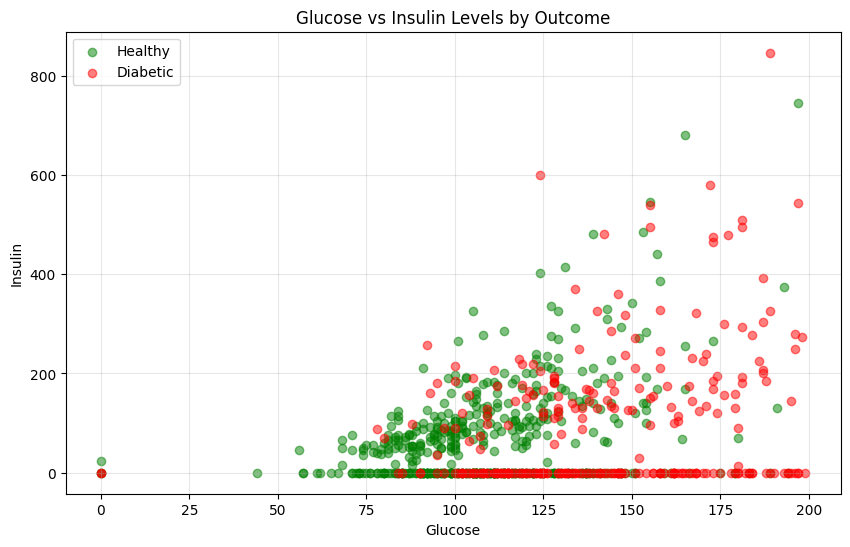

In [ ]:
# Diyabetli ve sağlıklı bireyler için veri bölme
diabetic = df[df['Outcome'] == 1]
healthy = df[df['Outcome'] == 0]

# Glikoz ve İnsülin seviyeleri arasındaki ilişkiyi scatter plot ile gösterme
plt.figure(figsize=(10, 6))
plt.scatter(healthy['Glucose'], healthy['Insulin'], color="green", label="Healthy", alpha=0.5)
plt.scatter(diabetic['Glucose'], diabetic['Insulin'], color="red", label="Diabetic", alpha=0.5)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.title("Glucose vs Insulin Levels by Outcome")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

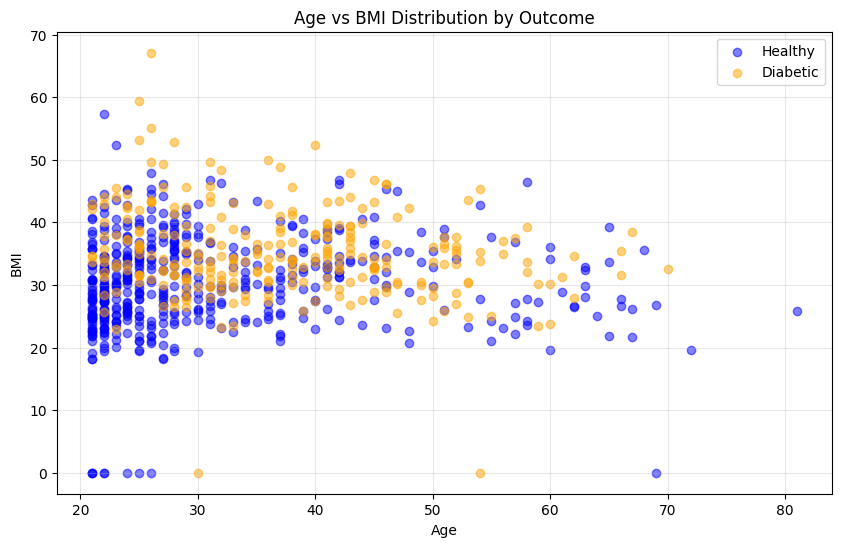

In [ ]:
# Yaş ve BMI dağılımını Outcome'a göre görselleştirme
plt.figure(figsize=(10, 6))

# Sağlıklı bireyler
plt.scatter(healthy['Age'], healthy['BMI'], color="blue", label="Healthy", alpha=0.5)

# Diyabetli bireyler
plt.scatter(diabetic['Age'], diabetic['BMI'], color="orange", label="Diabetic", alpha=0.5)

plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Age vs BMI Distribution by Outcome")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

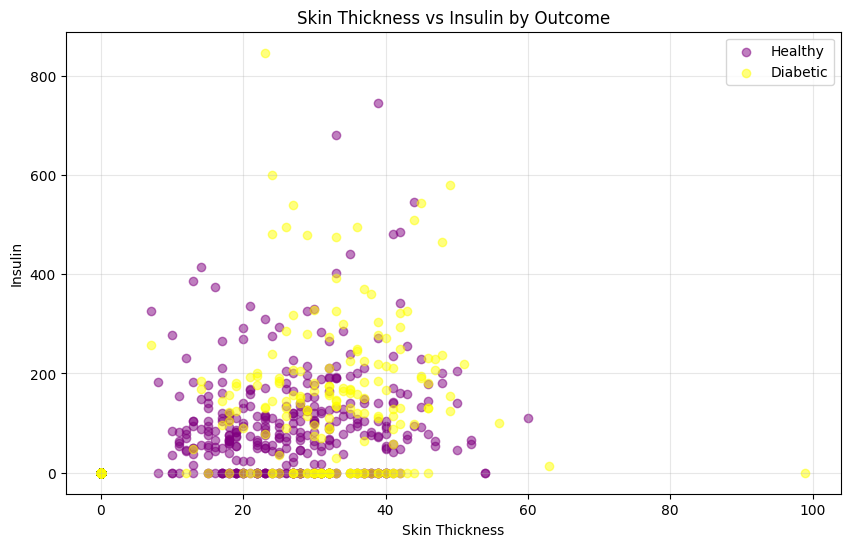

In [ ]:
#Deri Kalınlığı ve İnsülin İlişkisi
plt.figure(figsize=(10, 6))
plt.scatter(healthy['SkinThickness'], healthy['Insulin'], color="purple", label="Healthy", alpha=0.5)
plt.scatter(diabetic['SkinThickness'], diabetic['Insulin'], color="yellow", label="Diabetic", alpha=0.5)
plt.xlabel("Skin Thickness")
plt.ylabel("Insulin")
plt.title("Skin Thickness vs Insulin by Outcome")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

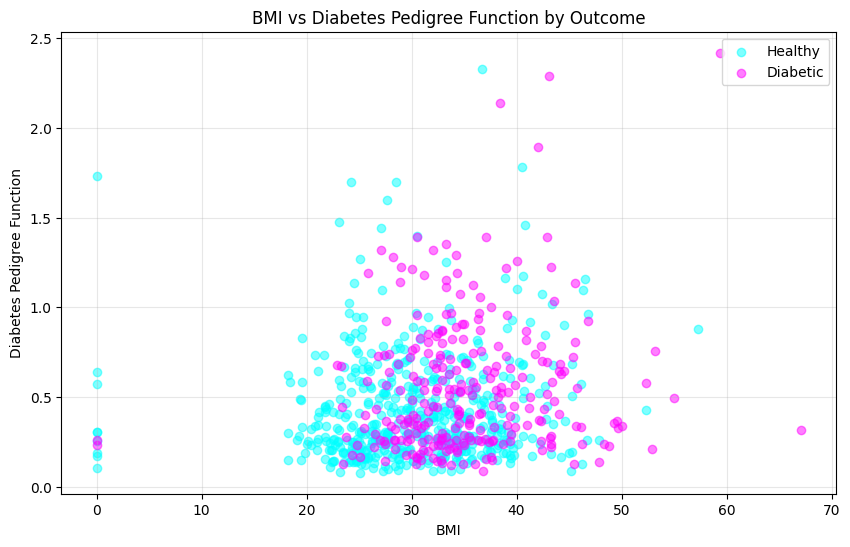

In [ ]:
#Vücut Kitle İndeksi (BMI) ve Diyabet Pedigree Fonksiyonu İlişkisi
plt.figure(figsize=(10, 6))
plt.scatter(healthy['BMI'], healthy['DiabetesPedigreeFunction'], color="cyan", label="Healthy", alpha=0.5)
plt.scatter(diabetic['BMI'], diabetic['DiabetesPedigreeFunction'], color="magenta", label="Diabetic", alpha=0.5)
plt.xlabel("BMI")
plt.ylabel("Diabetes Pedigree Function")
plt.title("BMI vs Diabetes Pedigree Function by Outcome")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


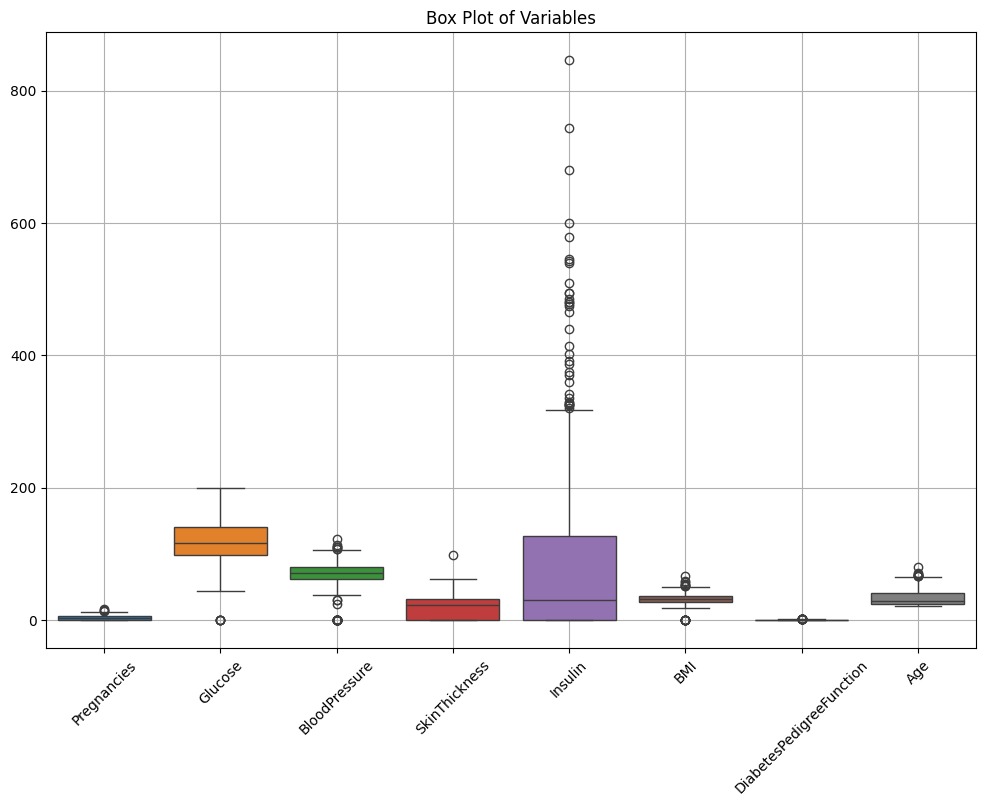

In [ ]:
import seaborn as sns

# Kutu grafik (Box Plot) ile her değişkenin dağılımını gösterelim
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns='Outcome'))  # Outcome hariç tüm sütunlar
plt.title("Box Plot of Variables")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


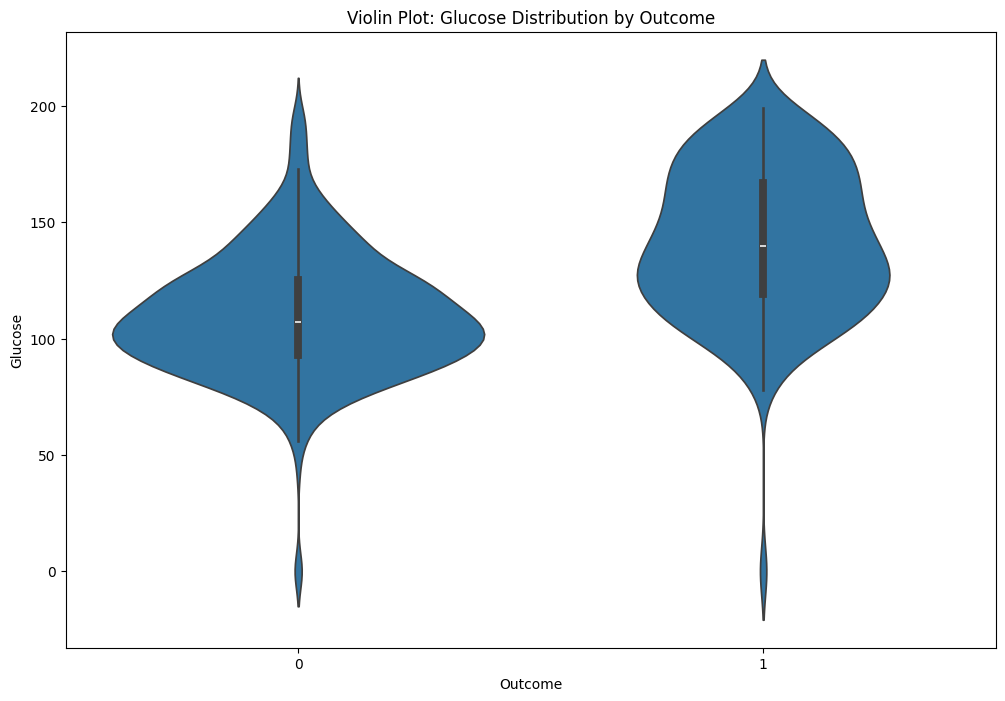

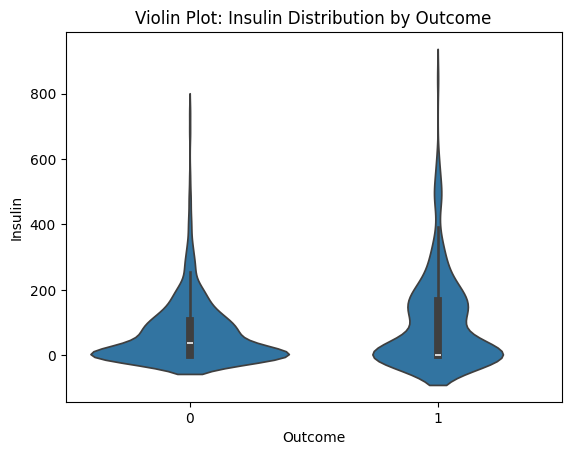

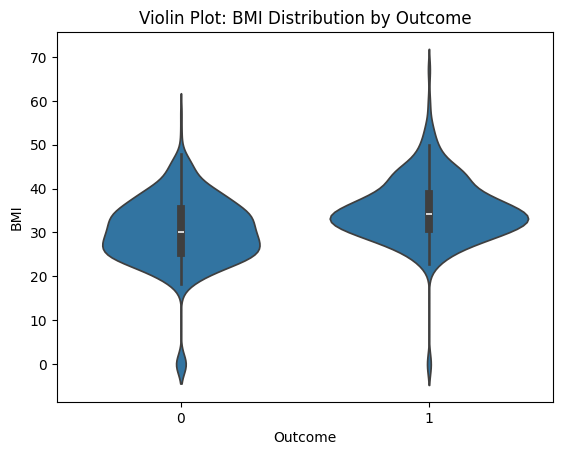

In [ ]:
# Violin grafiği ile her bir değişkenin dağılımını Outcome'a göre görelim
plt.figure(figsize=(12, 8))

# Violin plot: Outcome'a göre her değişkenin dağılımı
sns.violinplot(x='Outcome', y='Glucose', data=df)
plt.title("Violin Plot: Glucose Distribution by Outcome")
plt.show()

sns.violinplot(x='Outcome', y='Insulin', data=df)
plt.title("Violin Plot: Insulin Distribution by Outcome")
plt.show()

sns.violinplot(x='Outcome', y='BMI', data=df)
plt.title("Violin Plot: BMI Distribution by Outcome")
plt.show()


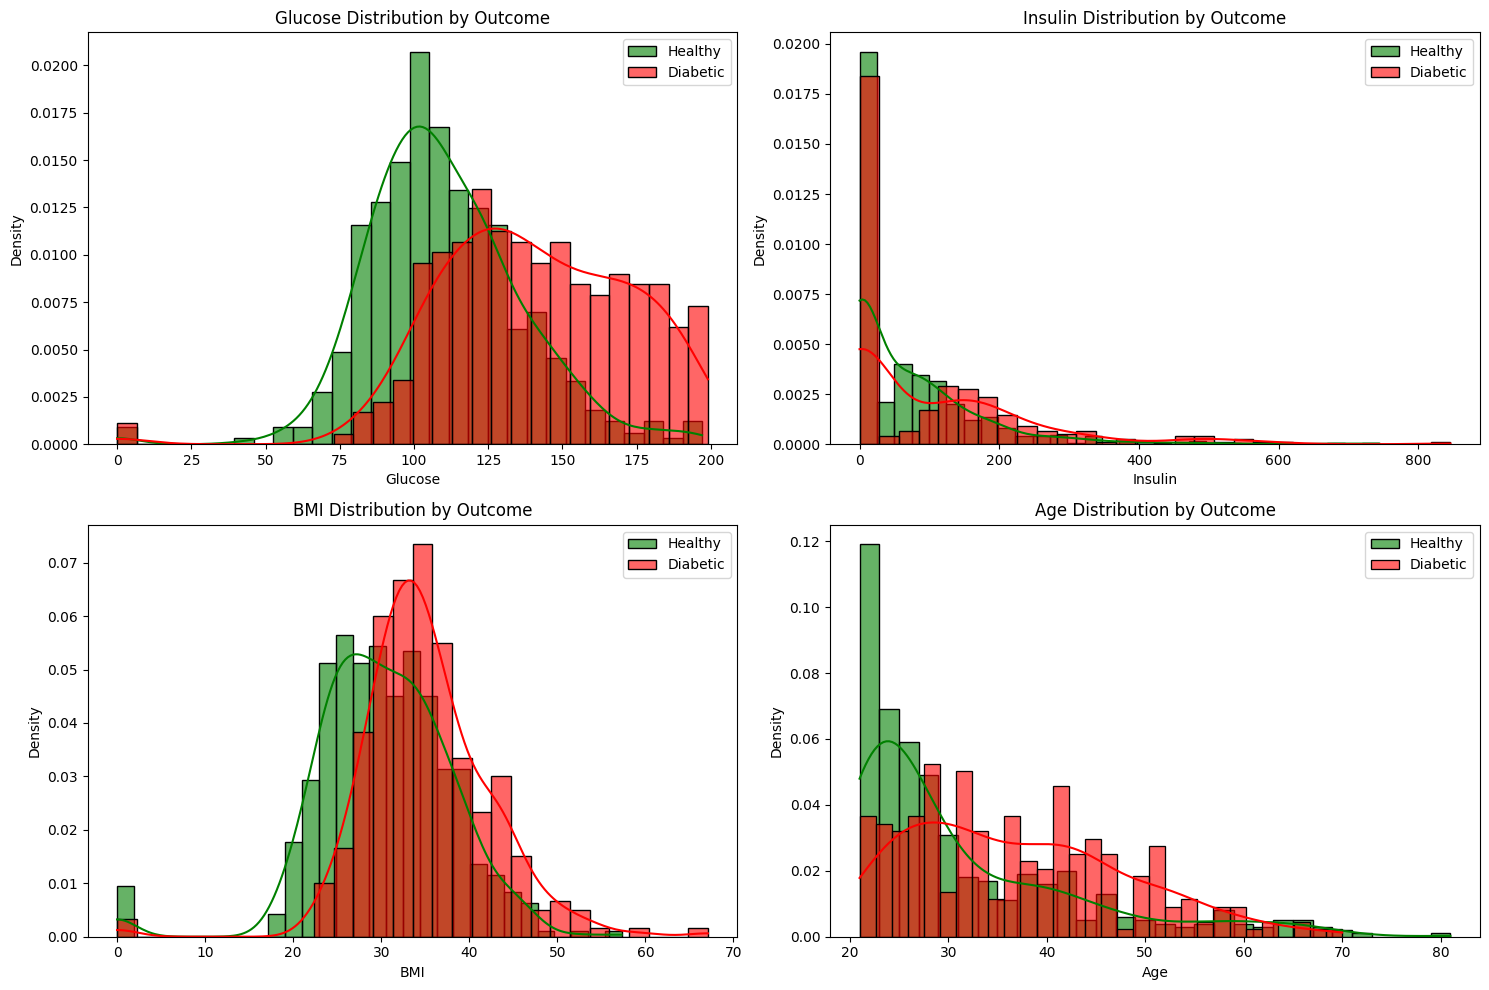

In [ ]:
# Histogramlar: Outcome'a göre Glikoz, İnsülin, BMI ve Yaş dağılımı
plt.figure(figsize=(15, 10))

# Glikoz dağılımı
plt.subplot(2, 2, 1)
sns.histplot(healthy['Glucose'], color="green", label="Healthy", kde=True, stat="density", alpha=0.6, bins=30)
sns.histplot(diabetic['Glucose'], color="red", label="Diabetic", kde=True, stat="density", alpha=0.6, bins=30)
plt.title("Glucose Distribution by Outcome")
plt.legend()

# İnsülin dağılımı
plt.subplot(2, 2, 2)
sns.histplot(healthy['Insulin'], color="green", label="Healthy", kde=True, stat="density", alpha=0.6, bins=30)
sns.histplot(diabetic['Insulin'], color="red", label="Diabetic", kde=True, stat="density", alpha=0.6, bins=30)
plt.title("Insulin Distribution by Outcome")
plt.legend()

# BMI dağılımı
plt.subplot(2, 2, 3)
sns.histplot(healthy['BMI'], color="green", label="Healthy", kde=True, stat="density", alpha=0.6, bins=30)
sns.histplot(diabetic['BMI'], color="red", label="Diabetic", kde=True, stat="density", alpha=0.6, bins=30)
plt.title("BMI Distribution by Outcome")
plt.legend()

# Yaş dağılımı
plt.subplot(2, 2, 4)
sns.histplot(healthy['Age'], color="green", label="Healthy", kde=True, stat="density", alpha=0.6, bins=30)
sns.histplot(diabetic['Age'], color="red", label="Diabetic", kde=True, stat="density", alpha=0.6, bins=30)
plt.title("Age Distribution by Outcome")
plt.legend()

plt.tight_layout()
plt.show()


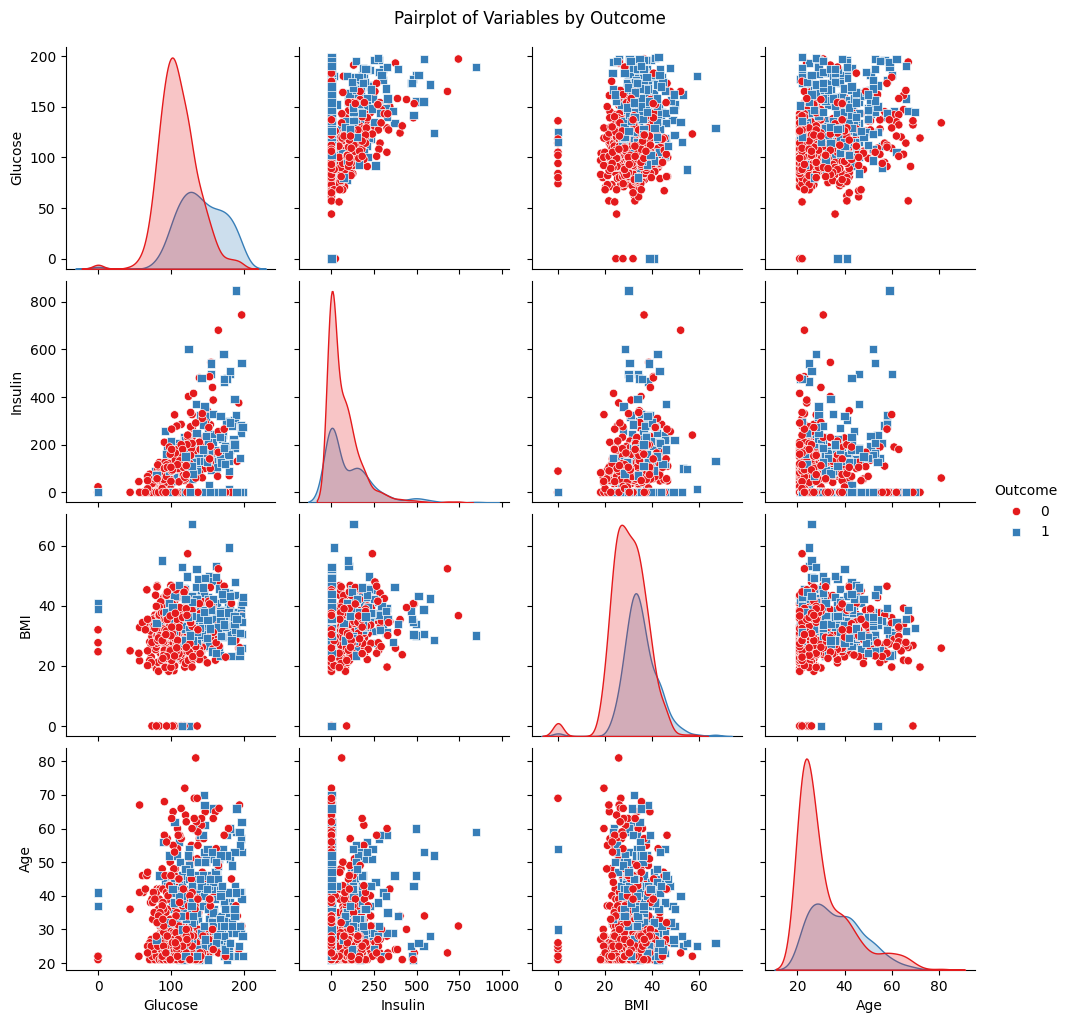

In [ ]:
# Pairplot: Outcome'a göre değişkenler arasındaki ilişkileri inceleyelim
sns.pairplot(df, hue="Outcome", vars=['Glucose', 'Insulin', 'BMI', 'Age'], palette="Set1", markers=["o", "s"])
plt.suptitle("Pairplot of Variables by Outcome", y=1.02)
plt.show()


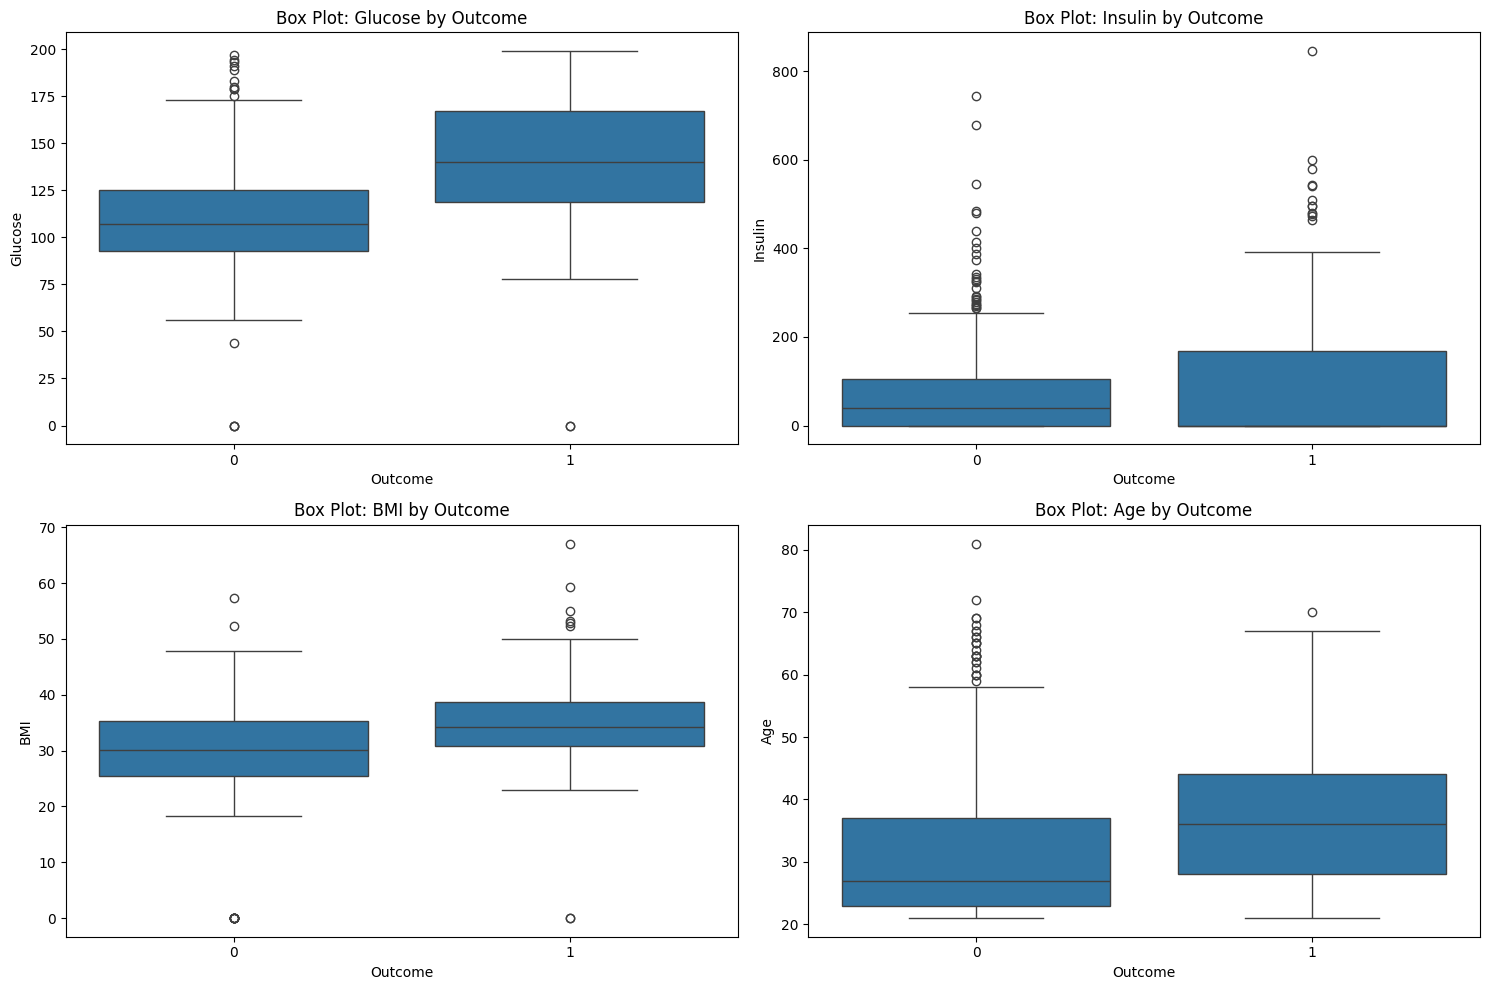

In [ ]:
# Boxplot: Outcome'a göre değişkenlerin dağılımını görelim
plt.figure(figsize=(15, 10))

# Glikoz boxplot'u
plt.subplot(2, 2, 1)
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title("Box Plot: Glucose by Outcome")

# İnsülin boxplot'u
plt.subplot(2, 2, 2)
sns.boxplot(x='Outcome', y='Insulin', data=df)
plt.title("Box Plot: Insulin by Outcome")

# BMI boxplot'u
plt.subplot(2, 2, 3)
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title("Box Plot: BMI by Outcome")

# Yaş boxplot'u
plt.subplot(2, 2, 4)
sns.boxplot(x='Outcome', y='Age', data=df)
plt.title("Box Plot: Age by Outcome")

plt.tight_layout()
plt.show()
